<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Lecture_6_classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us define some functions for plotting linestrings

In [35]:
from matplotlib import pyplot
from shapely.geometry import MultiLineString
import math

COLOR = {
    True:  '#7fb3d5',
    False: '#85929e'
    }

def v_color(ob): 
    return COLOR[ob.is_simple]

def plot_coords(ax, ob):  # display cordinates 
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, 'o', color='blue', zorder=1)

def plot_bounds(ax, ob): # display coordinates at the bound (begin and end points of a line)
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))
    ax.plot(x, y, 'o', color='green', zorder=1)

def plot_lines(ax, ob): # draw lines
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, color=v_color(ob), alpha=0.7,  solid_capstyle='round', zorder=2)

def plot_point(ax, pt): # display coordinates at the bound (begin and end points of a line)
    x, y = pt.x, pt.y
    ax.plot(x, y, '*', color='red', zorder=1)

Now, let us read the data from a sample text file with coordinates

In [8]:
import numpy as np
#Read the raw text file as a numpy array
data = np.loadtxt("sample_data_Lecture6.txt",delimiter = ";", skiprows = 1)
data

array([[33., 11., 44., 38.],
       [71., 24., 17., 49.],
       [52., 52., 69., 48.],
       [68., 48., 67., 34.],
       [11., 76., 43., 24.],
       [28., 36., 84., 53.],
       [49., 19., 30., 48.],
       [47., 56., 20., 28.],
       [66., 78., 71., 43.],
       [64., 49., 32., 89.],
       [51., 23., 61., 16.],
       [28., 37., 82., 67.],
       [90., 41., 65., 58.],
       [37., 84., 50., 48.],
       [20., 35., 46., 58.]])

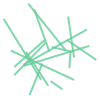

In [9]:
# Import necessary geometric objects from shapely module
from shapely.geometry import MultiLineString, LineString, Point
#Create a blank list 
lines = []

# create locations using coordinates from the 'data' array
for item in data:    # Iterate over the rows of this numpy array 
  #In each row pick the 1st and 2nd item to create the start 'Point' and the 3rd and 4th item to create the end 'Point
  start_point = Point(item[0], item[1])
  end_point = Point(item[2], item[3])
  line = LineString((start_point,end_point)) # define each line by combining the start and end points
  lines.append(line) #Add all lines to a list

multi_line = MultiLineString(lines) # create a new MultiLineString
multi_line

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` pro

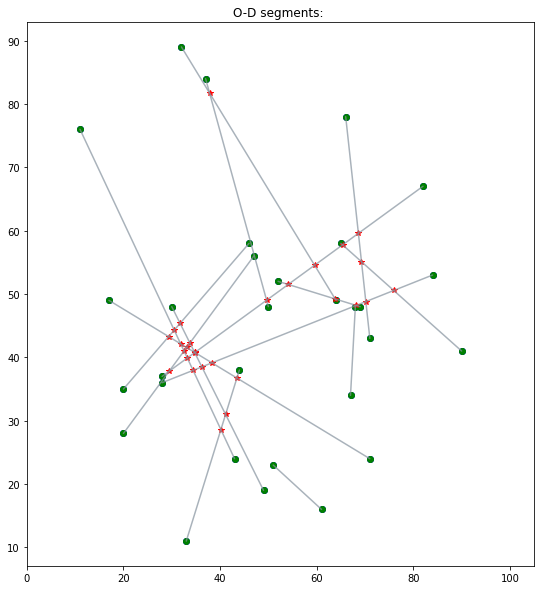

In [36]:
# Create a plot using the 'ax' and 'fig' ttributes
fig = pyplot.figure(1, figsize=(20.0, 10.0)) # figuresize -- provides width and height information of the plot
ax = fig.add_subplot(121) #Adds a plot within the defined width & height

#Call the plot functions defined above with the multi_line you just created
plot_coords(ax, multi_line)
plot_bounds(ax, multi_line)
plot_lines(ax, multi_line)

#Store the length of the multiline in the 'num' variable
num = len(multi_line)

# Use 2 for loops to find the intersection points of the lines
for i in range(0,num-1): # Loops through all lines from the first to the second last line
  for j in range(i+1, num): # Loops through  (i+1)th line to the last line 
      line_i = multi_line[i] #Picks first line from 'i' loop
      line_j = multi_line[j] #Picks second line from 'j' loop
      
      pt = line_i.intersection(line_j) #Find intersection point of line_i and line_j
      if not pt.is_empty: #Check if there is a valid intersection only then plot the point of intersection
        plot_point(ax,pt)
      
      
ax.set_title('O-D segments: ')

xrange = [0, 105]
yrange = [0, 105]
ax.set_xlim(*xrange)


pyplot.show()

In [12]:
range(num-1)

range(0, 14)